# Visualizing driver results - Single Camera

In [3]:
import pandas as pd
import numpy as np
import os
import glob
import json
import matplotlib.pyplot as plt
from collections import defaultdict

In [4]:
aspect = 1.3
height = 2.5
# params = {'legend.fontsize': 'x-large',
#           'figure.figsize': (15, 5),
#          'axes.labelsize': 'x-large',
#          'axes.titlesize':'x-large',
#          'xtick.labelsize':'x-large',
#          'ytick.labelsize':'x-large'}

params = {'axes.labelsize': 'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
plt.rcParams.update(params)

In [3]:
#BASE_DIR = '/home/romilb/research/msr/results/system_impl/multicity/3city_utilitysim/0713_fixed_seed/'
#BASE_DIR='/home/romilb/research/msr/results/system_impl/0724_INCORRECT_cityscapes_varynumcities_200period/3cities'
#BASE_DIR='/home/romilb/research/msr/results/system_impl/0804_cityscapes_caching/multicity/1cities'
#BASE_DIR='/home/romilb/research/msr/results/system_impl/microprofiling/0905/3cities'
#BASE_DIR='/home/romilb/research/msr/results/system_impl/multicity/thief_multicity/0913_fairbaselines_all'
BASE_DIR='/home/romilb/research/msr/results/system_impl/multigpu/0914_5tasks/'

In [4]:
inference_columns = ["timestamp", "task_id", "chunk_id", "test_acc"]

### Read data

In [5]:
def read_data(BASE_DIR):
    schedulers = next(os.walk(BASE_DIR))[1]
    cities = [os.path.basename(f).strip('.csv').split('_')[-1] for f in glob.glob(os.path.join(BASE_DIR, schedulers[0], "inference_*.csv"))]
    print(schedulers)
    print(cities)
    data = {}
    dfs = []
    for scheduler in schedulers:
        for city in cities:
            inference_csv_path = os.path.join(BASE_DIR, scheduler, "inference_{}.csv".format(city))
            inference_df = pd.read_csv(inference_csv_path, names=inference_columns)
            inference_df['t'] = inference_df["timestamp"] - inference_df["timestamp"].min()
            inference_df['city'] = city
            inference_df['scheduler'] = scheduler
            dfs.append(inference_df)
    all_data = pd.concat(dfs)
    return all_data, schedulers, cities

### Break into citywise and compute means

In [6]:
def get_mean_acc(all_data, scheduler):
    return all_data[(all_data['scheduler'] == scheduler)].mean()['test_acc']

In [7]:
styles = ['^-', 'v-', 'o-']
renaming = []# [('fair_0.5', 'Fair Scheduler'), ('thief', 'Ekya')]

In [14]:
dfs = []
NUM_GPUS_RANGE = [int(folder_name.split('gpu')[0]) for folder_name in os.listdir(BASE_DIR)]
for num_gpus in NUM_GPUS_RANGE:
    NUM_CITIES_RANGE = [int(folder_name.split('cities')[0]) for folder_name in os.listdir(os.path.join(BASE_DIR, '{}gpu'.format(num_gpus)))]
    for num_cities in NUM_CITIES_RANGE:
        data_path=os.path.join(BASE_DIR, '{}gpu'.format(num_gpus), '{}cities'.format(num_cities))
        all_data, _, _ = read_data(data_path)
        all_data['num_cities'] = num_cities
        all_data['num_gpus'] = num_gpus
        for name, new_name in renaming:
            all_data['scheduler'].replace(name, new_name, inplace=True)
        dfs.append(all_data)

        df = pd.concat(dfs)

['thief', 'fair_0.5', 'fair_4_8_0.5', 'fair_5_29_0.3', 'fair_3_17_0.7']
['jena', 'darmstadt', 'zurich', 'cologne', 'bremen', 'aachen']
['thief', 'fair_0.5', 'fair_4_8_0.5', 'fair_5_29_0.3', 'fair_3_17_0.7']
['jena', 'dusseldorf', 'darmstadt', 'monchengladbach', 'zurich', 'cologne', 'bremen', 'aachen']
['thief', 'fair_0.5', 'fair_4_8_0.5', 'fair_5_29_0.3', 'fair_3_17_0.7']
['jena', 'zurich']
['thief', 'fair_0.5', 'fair_4_8_0.5', 'fair_5_29_0.3', 'fair_3_17_0.7']
['jena', 'darmstadt', 'zurich', 'aachen']
['thief', 'fair_0.5']
['jena', 'dusseldorf', 'darmstadt', 'monchengladbach', 'zurich', 'cologne', 'bremen', 'stuttgart', 'aachen', 'tubingen']
['thief', 'fair_0.5', 'fair_4_8_0.5', 'fair_5_29_0.3', 'fair_3_17_0.7']
['jena', 'darmstadt', 'zurich', 'cologne', 'bremen', 'aachen']
['thief', 'fair_0.5', 'fair_4_8_0.5', 'fair_5_29_0.3', 'fair_3_17_0.7']
['jena', 'dusseldorf', 'darmstadt', 'monchengladbach', 'zurich', 'cologne', 'bremen', 'aachen']
['thief', 'fair_0.5', 'fair_4_8_0.5', 'fair_5_

In [15]:
mean_data = df.groupby(['num_gpus', 'num_cities', 'scheduler']).mean()['test_acc']
mean_data[4,8,'Fair Scheduler'] = 0.799894957983193
mean_data

num_gpus  num_cities  scheduler     
1         2           fair_0.5          0.785893
                      fair_3_17_0.7     0.851429
                      fair_4_8_0.5      0.821607
                      fair_5_29_0.3     0.674480
                      thief             0.819286
          4           fair_0.5          0.622561
                      fair_3_17_0.7     0.771593
                      fair_4_8_0.5      0.623288
                      fair_5_29_0.3     0.507824
                      thief             0.724635
          6           fair_0.5          0.524615
                      fair_3_17_0.7     0.650868
                      fair_4_8_0.5      0.525031
                      fair_5_29_0.3     0.377932
                      thief             0.681659
          8           fair_0.5          0.500151
                      fair_3_17_0.7     0.544225
                      fair_4_8_0.5      0.500014
                      fair_5_29_0.3     0.356591
                      thief     

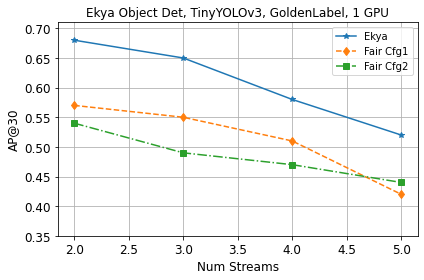

In [26]:
# TinyYOLO
data_x = [2,3,4,5]
# Feb 22
# acc_data_ekya = [0.45, 0.42, 0.36, 0.3]
# acc_data_fair1 = [0.37, 0.33, 0.32, 0.29]
# acc_data_fair2 = [0.43, 0.35, 0.27, 0.21]


acc_data_ekya = [0.68, 0.65, 0.58, 0.52]
acc_data_fair1 = [0.57, 0.55, 0.51, 0.42]
acc_data_fair2 = [0.54, 0.49, 0.47, 0.44]

plt.figure()

plt.plot(data_x, acc_data_ekya, label='Ekya', marker='*', ls='-')
plt.plot(data_x, acc_data_fair1, label='Fair Cfg1', marker='d', ls='--')
plt.plot(data_x, acc_data_fair2, label='Fair Cfg2', marker='s', ls='-.')
plt.legend()
plt.ylim([0.35,0.71])

plt.title('Ekya Object Det, TinyYOLOv3, GoldenLabel, 1 GPU')
plt.xlabel('Num Streams')
plt.ylabel('AP@30')
plt.grid()

plt.tight_layout()
plt.savefig('ekya_1GPU_objdet_cityscapes_200s_mAP30.pdf')

ValueError: x and y must have same first dimension, but have shapes (5,) and (4,)

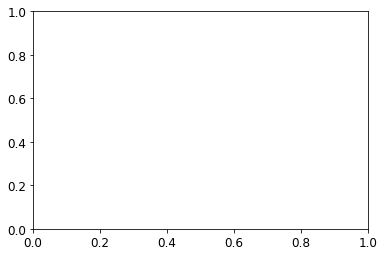

In [16]:

acc_data_ekya = [0.59, 0.54, 0.49, 0.47]
acc_data_fair1 = [0.49, 0.46, 0.42, 0.41]
acc_data_fair2 = [0.44, 0.41, 0.38, 0.35]

plt.figure()

plt.plot(data_x, acc_data_ekya, label='Ekya', marker='*', ls='-')
plt.plot(data_x, acc_data_fair1, label='Fair Cfg1', marker='d', ls='--')
plt.plot(data_x, acc_data_fair2, label='Fair Cfg2', marker='s', ls='-.')
plt.legend()
plt.ylim([0.35,0.66])

plt.title('Ekya Object Det, TinyYOLOv3, GoldenLabel, 1 GPU')
plt.xlabel('Num Streams')
plt.ylabel('F1@50')
plt.grid()

plt.tight_layout()
plt.savefig('ekya_1GPU_objdet_cityscapes_200s_F1.pdf')

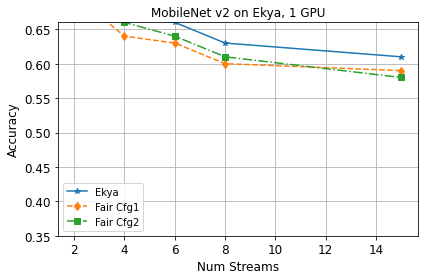

In [19]:
# MobileNet
data_x = [2,4,6,8,10]
acc_data_ekya = [0.69, 0.67, 0.66, 0.63, 0.61]
acc_data_fair1 = [0.70, 0.64, 0.63, 0.60, 0.59]
acc_data_fair2 = [0.67, 0.66, 0.64, 0.61, 0.58]
plt.figure()

plt.plot(data_x, acc_data_ekya, label='Ekya', marker='*', ls='-')
plt.plot(data_x, acc_data_fair1, label='Fair Cfg1', marker='d', ls='--')
plt.plot(data_x, acc_data_fair2, label='Fair Cfg2', marker='s', ls='-.')
plt.legend()
plt.ylim([0.35,0.66])

plt.title('MobileNet v2 on Ekya, 1 GPU')
plt.xlabel('Num Streams')
plt.ylabel('Accuracy')
plt.grid()

plt.tight_layout()
plt.savefig('mobilenet_ekya_1GPU_cityscapes_200s.pdf')

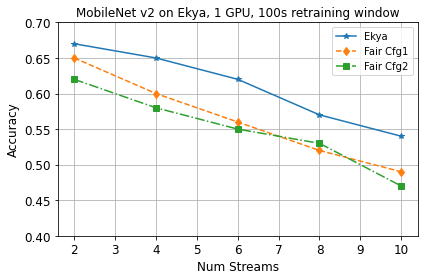

In [8]:
# MobileNet with short retraining window
data_x = [2,4,6,8,10]
acc_data_ekya = [0.67, 0.65, 0.62, 0.57, 0.54]
acc_data_fair1 = [0.65, 0.60, 0.56, 0.52, 0.49]
acc_data_fair2 = [0.62, 0.58, 0.55, 0.53, 0.47]
plt.figure()

plt.plot(data_x, acc_data_ekya, label='Ekya', marker='*', ls='-')
plt.plot(data_x, acc_data_fair1, label='Fair Cfg1', marker='d', ls='--')
plt.plot(data_x, acc_data_fair2, label='Fair Cfg2', marker='s', ls='-.')
plt.legend()
plt.ylim([0.4,0.7])

plt.title('MobileNet v2 on Ekya, 1 GPU, 100s retraining window')
plt.xlabel('Num Streams')
plt.ylabel('Accuracy')
plt.grid()

plt.tight_layout()
plt.savefig('mobilenet_ekya_1GPU_cityscapes_100s.pdf')

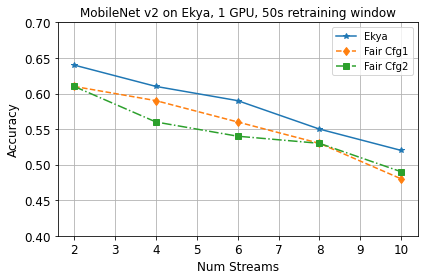

In [10]:
# MobileNet with 50s retraining window
data_x = [2,4,6,8,10]
acc_data_ekya = [0.64, 0.61, 0.59, 0.55, 0.52]
acc_data_fair1 = [0.61, 0.59, 0.56, 0.53, 0.48]
acc_data_fair2 = [0.61, 0.56, 0.54, 0.53, 0.49]
plt.figure()

plt.plot(data_x, acc_data_ekya, label='Ekya', marker='*', ls='-')
plt.plot(data_x, acc_data_fair1, label='Fair Cfg1', marker='d', ls='--')
plt.plot(data_x, acc_data_fair2, label='Fair Cfg2', marker='s', ls='-.')
plt.legend()
plt.ylim([0.4,0.7])

plt.title('MobileNet v2 on Ekya, 1 GPU, 50s retraining window')
plt.xlabel('Num Streams')
plt.ylabel('Accuracy')
plt.grid()

plt.tight_layout()
plt.savefig('mobilenet_ekya_1GPU_cityscapes_50s.pdf')

In [11]:
plot_mean_data = d.stack()

In [12]:
plotting_tuples = [('fair_0.5', 'Uniform (Cfg 1, 50%)', '*', '--', 'C1'),
                  ('fair_5_29_0.3', 'Uniform (Cfg 2, 30%)', 'd', '--', 'C1'),
                  ('fair_4_8_0.5', 'Uniform (Cfg 2, 50%)', 's', '-.', 'C1'),
                  ('fair_3_17_0.7', 'Uniform (Cfg 2, 90%)', 'x', '-', 'C1'),
                  ('thief', 'Ekya', 'o', '-', 'C2')]

In [ ]:
NUM_GPUS_RANGE=[1,2]

nrow = 1; ncol = 2;
fig, axs = plt.subplots(figsize=[aspect*height*1.9, height], nrows=nrow, ncols=ncol)
axs = axs.reshape(-1)

for i, gpus in enumerate(NUM_GPUS_RANGE):
    print(gpus)
    #fig = plt.figure(figsize=[aspect*height, height])
    ax=axs[i]
    for sched, label, marker, style, color in plotting_tuples:
        ax=plot_mean_data[gpus].unstack(level=0).loc[[2,4,6,8]][sched].plot(ax=ax, label=label, marker=marker, style=style, color=color)
    #ax=plot_mean_data[gpus].unstack(level=0).loc[[2,4,6,8]].plot(marker='o',ax=ax)# Change level to 1 if that works
    #plt.title('{} GPUs'.format(gpus))
    ax.set_xlabel('Video Streams')
    ax.set_ylabel('Accuracy')
    x_tick_range = range(2,9,2)
    ax.set_xticks(x_tick_range)
    ax.set_xticklabels(["{:d}".format(x) for x in x_tick_range])
    #ax.set_xlim([0.8, 3.2])
    xlim = ax.get_xlim()
    xlim = [xlim[0] - 0.2, xlim[1] + 0.2]
    ax.set_xlim(xlim)
    
    y_tick_range = np.arange(0.35,0.95,0.1)
    ax.set_yticks(y_tick_range)
    ax.set_ylim([0.4, 0.95])
    ax.set_yticklabels(["{:.2f}".format(x) for x in y_tick_range])
    #ax.set_ylim([0.35, 0.85])
    ax.yaxis.grid(True)
    ax.set_title(f'{gpus} provisioned GPUs')
#axs[1].set_ylim([0.5, 0.85])
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(0,1,1,0.15), ncol=3)
#plt.legend( handles, labels, loc = 'upper center', bbox_to_anchor = (0,-0.1,1,1), bbox_transform = plt.gcf().transFigure )
plt.tight_layout()
#lgd = ax.legend(loc="lower center", bbox_to_anchor=(0,1.02,1,0.2), ncol=2)
#plt.savefig(os.path.join("camready/sysimpl_varyingcities_streams_cityscapes_{}gpu.pdf".format(gpus)), bbox_inches='tight')
plt.savefig(os.path.join("camready/tinyolo_cityscapes.pdf".format(gpus)), bbox_inches='tight')

In [3]:
# Data for NSDI21 Camera Ready

plotting_tuples = [('uniform_1_50', 'Uniform (Cfg 1, 50%)', '*', '--', 'C1'),
                  ('uniform_2_30', 'Uniform (Cfg 2, 30%)', 'd', '--', 'C1'),
                  ('uniform_2_50', 'Uniform (Cfg 2, 50%)', 's', '-.', 'C1'),
                  ('uniform_2_90', 'Uniform (Cfg 2, 90%)', 'x', '-', 'C1'),
                  ('thief', 'Ekya', 'o', '-', 'C2')]

data = {}

# Mobilenet
model_data = {}
model_data['streams'] = [2, 4, 6, 8]
model_data['thief'] = [0.78, 0.69, 0.63, 0.59]
model_data['uniform_1_50'] = [0.71, 0.59, 0.54, 0.43]
model_data['uniform_2_30'] = [0.62, 0.56, 0.47, 0.35]
model_data['uniform_2_50'] = [0.68, 0.64, 0.58, 0.51]
model_data['uniform_2_90'] = [0.65, 0.62, 0.52, 0.43]
data['mobilenet'] = model_data

# Squeezenet
model_data = {}
model_data['streams'] = [2, 4, 6, 8]
model_data['thief'] = [0.71, 0.62, 0.56, 0.54]
model_data['uniform_1_50'] = [0.66, 0.57, 0.49, 0.42]
model_data['uniform_2_30'] = [0.63, 0.53, 0.45, 0.38]
model_data['uniform_2_50'] = [0.65, 0.54, 0.50, 0.46]
model_data['uniform_2_90'] = [0.61, 0.58, 0.53, 0.48]
data['squeezenet'] = model_data

# shufflenet
model_data = {}
model_data['streams'] = [2, 4, 6, 8]
model_data['thief'] = [0.74, 0.65, 0.59, 0.53]
model_data['uniform_1_50'] = [0.65, 0.59, 0.43, 0.41]
model_data['uniform_2_30'] = [0.59, 0.53, 0.45, 0.38]
model_data['uniform_2_50'] = [0.60, 0.54, 0.50, 0.46]
model_data['uniform_2_90'] = [0.63, 0.58, 0.51, 0.42]
data['shufflenet'] = model_data

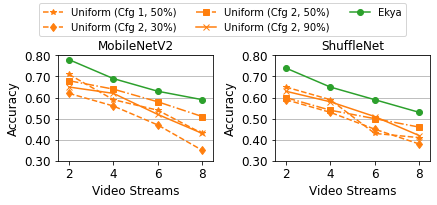

In [4]:
NUM_GPUS_RANGE=[1,2]

nrow = 1; ncol = 2;
fig, axs = plt.subplots(figsize=[aspect*height*1.9, height], nrows=nrow, ncols=ncol)
axs = axs.reshape(-1)

models = ['mobilenet', 'shufflenet']
titles = ['MobileNetV2', 'ShuffleNet']

for i in [0,1]:
    ax=axs[i]
    model = models[i]
    plot_data = data[model]
    for sched, label, marker, style, color in plotting_tuples:
        ax.plot(plot_data['streams'], plot_data[sched], label=label, marker=marker, ls=style, color=color)
    #ax=plot_mean_data[gpus].unstack(level=0).loc[[2,4,6,8]].plot(marker='o',ax=ax)# Change level to 1 if that works
    #plt.title('{} GPUs'.format(gpus))
    ax.set_xlabel('Video Streams')
    ax.set_ylabel('Accuracy')
    x_tick_range = range(2,9,2)
    ax.set_xticks(x_tick_range)
    ax.set_xticklabels(["{:d}".format(x) for x in x_tick_range])
    #ax.set_xlim([0.8, 3.2])
    xlim = ax.get_xlim()
    xlim = [xlim[0] - 0.2, xlim[1] + 0.2]
    ax.set_xlim(xlim)

    y_tick_range = np.arange(0.3,0.9,0.1)
    ax.set_yticks(y_tick_range)
    ax.set_ylim([0.3, 0.8])
    ax.set_yticklabels(["{:.2f}".format(x) for x in y_tick_range])
    #ax.set_ylim([0.35, 0.85])
    ax.yaxis.grid(True)
    ax.set_title(f'{titles[i]}')
#axs[1].set_ylim([0.5, 0.85])
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(0,1,1,0.15), ncol=3)
#plt.legend( handles, labels, loc = 'upper center', bbox_to_anchor = (0,-0.1,1,1), bbox_transform = plt.gcf().transFigure )
plt.tight_layout()
#lgd = ax.legend(loc="lower center", bbox_to_anchor=(0,1.02,1,0.2), ncol=2)
#plt.savefig(os.path.join("camready/sysimpl_varyingcities_streams_cityscapes_{}gpu.pdf".format(gpus)), bbox_inches='tight')
plt.savefig(os.path.join("camready/e2e_1gpu_cityscapes_objclass.pdf"), bbox_inches='tight')


In [12]:
# Data for NSDI21 Camera Ready

plotting_tuples = [('uniform_1_50', 'Uniform (Cfg 1, 50%)', '*', '--', 'C1'),
                  ('uniform_2_30', 'Uniform (Cfg 2, 30%)', 'd', '--', 'C1'),
                  ('uniform_2_50', 'Uniform (Cfg 2, 50%)', 's', '-.', 'C1'),
                  ('uniform_2_90', 'Uniform (Cfg 2, 90%)', 'x', '-', 'C1'),
                  ('thief', 'Ekya', 'o', '-', 'C2')]

data = {}

# TinyYOLOv3
model_data = {}
model_data['streams'] = [2, 3, 4, 5]
model_data['thief'] = [0.76, 0.69, 0.63, 0.52]
model_data['uniform_1_50'] = [0.69, 0.61, 0.52, 0.41]
model_data['uniform_2_30'] = [0.62, 0.51, 0.42, 0.31]
model_data['uniform_2_50'] = [0.71, 0.62, 0.57, 0.45]
model_data['uniform_2_90'] = [0.72, 0.58, 0.49, 0.38]
data['tinyyolo'] = model_data

# ssdlite
model_data = {}
model_data['streams'] = [2, 3, 4, 5]
model_data['thief'] = [0.73, 0.65, 0.57, 0.51]
model_data['uniform_1_50'] = [0.65, 0.59, 0.53, 0.41]
model_data['uniform_2_30'] = [0.64, 0.58, 0.52, 0.41]
model_data['uniform_2_50'] = [0.67, 0.55, 0.50, 0.43]
model_data['uniform_2_90'] = [0.59, 0.52, 0.46, 0.32]
data['ssdlite'] = model_data

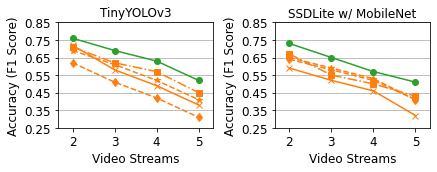

In [15]:
NUM_GPUS_RANGE=[1,2]

nrow = 1; ncol = 2;
fig, axs = plt.subplots(figsize=[aspect*height*1.9, height], nrows=nrow, ncols=ncol)
axs = axs.reshape(-1)

models = ['tinyyolo', 'ssdlite']
titles = ['TinyYOLOv3', 'SSDLite w/ MobileNet']

for i in [0,1]:
    ax=axs[i]
    model = models[i]
    plot_data = data[model]
    for sched, label, marker, style, color in plotting_tuples:
        ax.plot(plot_data['streams'], plot_data[sched], label=label, marker=marker, ls=style, color=color)
    #ax=plot_mean_data[gpus].unstack(level=0).loc[[2,4,6,8]].plot(marker='o',ax=ax)# Change level to 1 if that works
    #plt.title('{} GPUs'.format(gpus))
    ax.set_xlabel('Video Streams')
    ax.set_ylabel('Accuracy (F1 Score)')
    x_tick_range = range(2,6,1)
    ax.set_xticks(x_tick_range)
    ax.set_xticklabels(["{:d}".format(x) for x in x_tick_range])
    #ax.set_xlim([0.8, 3.2])
    xlim = ax.get_xlim()
    xlim = [xlim[0] - 0.2, xlim[1] + 0.2]
    ax.set_xlim(xlim)

    y_tick_range = np.arange(0.25,0.86,0.1)
    ax.set_yticks(y_tick_range)
    ax.set_ylim([0.25, 0.85])
    ax.set_yticklabels(["{:.2f}".format(x) for x in y_tick_range])
    #ax.set_ylim([0.35, 0.85])
    ax.yaxis.grid(True)
    ax.set_title(f'{titles[i]}')
#axs[1].set_ylim([0.5, 0.85])
handles, labels = ax.get_legend_handles_labels()
#fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(0,1,1,0.15), ncol=3)
#plt.legend( handles, labels, loc = 'upper center', bbox_to_anchor = (0,-0.1,1,1), bbox_transform = plt.gcf().transFigure )
plt.tight_layout()
#lgd = ax.legend(loc="lower center", bbox_to_anchor=(0,1.02,1,0.2), ncol=2)
#plt.savefig(os.path.join("camready/sysimpl_varyingcities_streams_cityscapes_{}gpu.pdf".format(gpus)), bbox_inches='tight')
plt.savefig(os.path.join("camready/e2e_1gpu_cityscapes_objdet.pdf"), bbox_inches='tight')

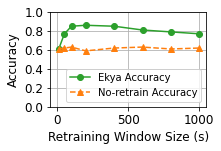

In [13]:
# Retraining window sensitivity
x_pts = [10,50,100,200,400,600,800, 1000]
y_pts = [0.61, 0.77, 0.85, 0.86, 0.85, 0.81, 0.79, 0.77]
noret_y_pts = [0.61, 0.62, 0.63, 0.59, 0.62, 0.63, 0.61, 0.62]

height=2.2
aspect=1.44
plt.figure(figsize=[aspect*height, height])
plt.plot(x_pts, y_pts, label='Ekya Accuracy', marker='o', ls='-', color='C2')
plt.plot(x_pts, noret_y_pts, label='No-retrain Accuracy', marker='^', ls='--', color='C1')


plt.legend(loc='lower right', ncol=1)

ax = plt.gca()
plt.grid()
ax.yaxis.grid(True)
y_tick_range = np.arange(0.0,1.01,0.2)
ax.set_yticks(y_tick_range)
ax.set_ylim([0, 1])
ax.set_xlim([-50, 1050])
ax.set_xlabel('Retraining Window Size (s)')
ax.set_ylabel('Accuracy')

plt.tight_layout()
plt.savefig(os.path.join("camready/retraining_window_sensitivity.pdf"), bbox_inches='tight')

In [18]:
for i in [0,1]:
    ax=axs[i]
    model = models[i]
    plot_data = data[model]
    for sched, label, marker, style, color in plotting_tuples:
        ax.plot(plot_data['streams'], plot_data[sched], label=label, marker=marker, ls=style, color=color)
    #ax=plot_mean_data[gpus].unstack(level=0).loc[[2,4,6,8]].plot(marker='o',ax=ax)# Change level to 1 if that works
    #plt.title('{} GPUs'.format(gpus))
    ax.set_xlabel('Video Streams')
    ax.set_ylabel('Accuracy (F1 Score)')
    x_tick_range = range(2,6,1)
    ax.set_xticks(x_tick_range)
    ax.set_xticklabels(["{:d}".format(x) for x in x_tick_range])
    #ax.set_xlim([0.8, 3.2])
    xlim = ax.get_xlim()
    xlim = [xlim[0] - 0.2, xlim[1] + 0.2]
    ax.set_xlim(xlim)

    y_tick_range = np.arange(0.25,0.86,0.1)
    ax.set_yticks(y_tick_range)
    ax.set_ylim([0.25, 0.85])
    ax.set_yticklabels(["{:.2f}".format(x) for x in y_tick_range])
    #ax.set_ylim([0.35, 0.85])
    ax.yaxis.grid(True)
    ax.set_title(f'{titles[i]}')
#axs[1].set_ylim([0.5, 0.85])
handles, labels = ax.get_legend_handles_labels()
#fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(0,1,1,0.15), ncol=3)
#plt.legend( handles, labels, loc = 'upper center', bbox_to_anchor = (0,-0.1,1,1), bbox_transform = plt.gcf().transFigure )
plt.tight_layout()
#lgd = ax.legend(loc="lower center", bbox_to_anchor=(0,1.02,1,0.2), ncol=2)
#plt.savefig(os.path.join("camready/sysimpl_varyingcities_streams_cityscapes_{}gpu.pdf".format(gpus)), bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

# Scratch

In [369]:
os.getcwd()

'/home/romilb/research/msr/ekya/ekya/viz'

In [311]:
fig = plt.figure(figsize=[aspect*height, height])
ax = plt.gca()
num_gpus = 2
num_cities = [4,8]
plot_data_x = defaultdict(list)
plot_data_y = defaultdict(list)

schedulers = [('thief', 'Ekya', 'o', 'C2'), ('fair_0.5', 'Fair0.5 Scheduler', 'v', 'C3')]
          #('fair_0.25', 'Fair0.25 Scheduler', 'v', 'C1'),
          #],
          #('fair_0.75', 'Fair0.75 Scheduler', 'v', 'C4')] #name, plotlabel 
for n in num_cities:
    data_path=os.path.join(BASE_DIR, '{}cities'.format(n))
    all_data, _, _ = read_data(data_path)
    for scheduler, label, _, _ in schedulers:
        plot_data_y[scheduler].append(get_mean_acc(all_data, scheduler))
        plot_data_x[scheduler].append(n)
        
for scheduler, label, style, color in schedulers:
    ax.plot(plot_data_x[scheduler], plot_data_y[scheduler], label=label, marker=style, color=color)

lgd = ax.legend(loc="lower center", bbox_to_anchor=(0,1.02,1,0.2), ncol=2)
ax.set_ylabel('Inference Accuracy')
ax.set_xlabel('Video Streams')

x_tick_range = range(1,4)
#ax.set_xticks(x_tick_range)
#ax.set_xticklabels(["{:d}".format(x) for x in x_tick_range])
#ax.set_xlim([0.8, 3.2])

#y_tick_range = np.arange(0.65,0.95,0.05)
#ax.set_yticks(y_tick_range)
#ax.set_yticklabels(["{:.2f}".format(x) for x in y_tick_range])
#ax.set_ylim([0.65, 0.92])
plt.tight_layout()
ax.yaxis.grid(True)
#plt.savefig(os.path.join("camready/sysimpl_varyingcities_cityscapes_real.pdf"), bbox_inches='tight')
plt.savefig(os.path.join("temp.pdf"), bbox_inches='tight')

SyntaxError: invalid syntax (<ipython-input-311-8107087308fa>, line 3)

In [48]:
plot_data_y['fair_0.5'][1] = 0.794
plot_data_y['fair_0.5'][2] = 0.762
plot_data_y['thief'][1] = 0.83

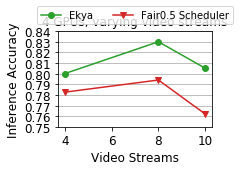

In [49]:
fig = plt.figure(figsize=[aspect*height, height])
ax = plt.gca()
for scheduler, label, style, color in schedulers:
    ax.plot(plot_data_x[scheduler], plot_data_y[scheduler], label=label, marker=style, color=color)

lgd = ax.legend(loc="lower center", bbox_to_anchor=(0,1.02,1,0.2), ncol=2)
ax.set_ylabel('Inference Accuracy')
ax.set_xlabel('Video Streams')

x_tick_range = range(1,4)
#ax.set_xticks(x_tick_range)
#ax.set_xticklabels(["{:d}".format(x) for x in x_tick_range])
#ax.set_xlim([0.8, 3.2])

y_tick_range = np.arange(0.75,0.85,0.01)
ax.set_yticks(y_tick_range)
ax.set_yticklabels(["{:.2f}".format(x) for x in y_tick_range])
#ax.set_ylim([0.65, 0.92])
plt.tight_layout()
ax.yaxis.grid(True)
plt.title('4 GPUs, varying video streams')
plt.savefig(os.path.join("temp.pdf"), bbox_inches='tight')

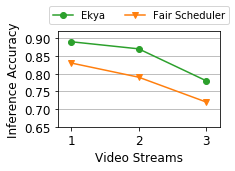

In [14]:
fig = plt.figure(figsize=[aspect*height, height])
ax = plt.gca()
num_cities = [1,2,3]
plot_data_x = defaultdict(list)
plot_data_y = defaultdict(list)

schedulers = [('thief', 'Ekya', 'o', 'C2'),
          ('fair', 'Fair Scheduler', 'v', 'C1')] #name, plotlabel 

plot_data_x = {'thief': [1,2,3],
              'fair': [1,2,3]}
plot_data_y = {'thief': [0.89, 0.87, 0.78],
              'fair': [0.83, 0.79, 0.72]}

for scheduler, label, style, color in schedulers:
    ax.plot(plot_data_x[scheduler], plot_data_y[scheduler], label=label, marker=style, color=color)

lgd = ax.legend(loc="lower center", bbox_to_anchor=(0,1.02,1,0.2), ncol=2)
ax.set_ylabel('Inference Accuracy')
ax.set_xlabel('Video Streams')

x_tick_range = range(1,4)
ax.set_xticks(x_tick_range)
ax.set_xticklabels(["{:d}".format(x) for x in x_tick_range])
ax.set_xlim([0.8, 3.2])

y_tick_range = np.arange(0.65,0.95,0.05)
ax.set_yticks(y_tick_range)
ax.set_yticklabels(["{:.2f}".format(x) for x in y_tick_range])
ax.set_ylim([0.65, 0.92])
plt.tight_layout()
ax.yaxis.grid(True)
plt.savefig(os.path.join("camready/sysimpl_varyingcities_waymo.pdf"), bbox_inches='tight')

In [ ]:
data = {}
for scheduler in schedulers:
    data_citywise = {}
    for city in cities:
        data_citywise[city] = all_data[(all_data['scheduler'] == scheduler)&(all_data['city'] == city)]
    data[scheduler] = data_citywise

##### Plot citywise-taskwise accuracy timeseries

In [9]:
scheds = data.keys()
scheds = ['200_1_thief_True']#, '200_1_inference_only_True']

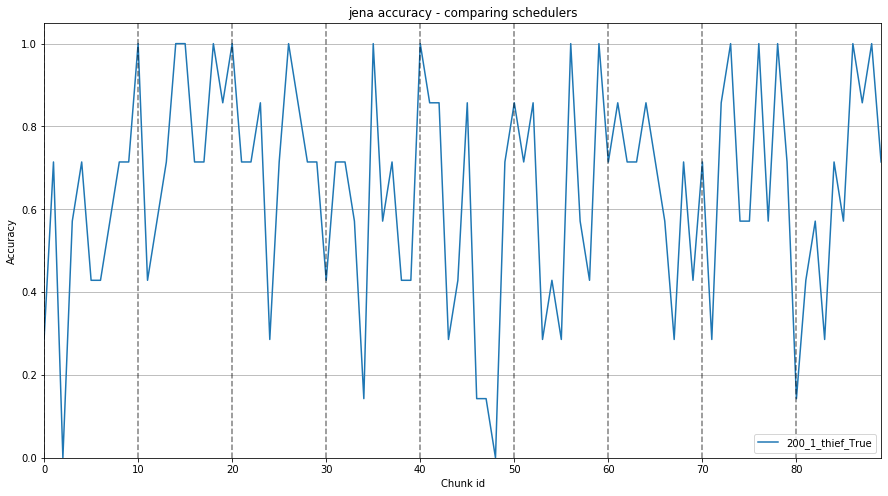

In [148]:
for city in cities:
    plt.figure(figsize=[15,8])
    ax = plt.gca()
    for scheduler in scheds:
        data[scheduler][city].plot(y="test_acc", ax=ax, label=scheduler)
    temp_df = data[scheduler][city]
    window_points = temp_df[temp_df["chunk_id"]==0].index
    for pt in window_points:
        plt.axvline(x=pt, color='black', alpha=0.5, ls='--')
    plt.title('{} accuracy - comparing schedulers'.format(city))
    ax.yaxis.grid(True)
    
    ax.set_ylim([0,1.05])
    ax.yaxis.grid(True)
    ax.set_ylabel('Accuracy')
    ax.set_xlabel('Chunk id')
    #plt.title("{} - μ Retraining: {:.2f}, no retraining: {:.2f}".format(city, data["fair"][city]["test_acc"].mean(),
    #                                                                data["noretrain"][city]["test_acc"].mean()))

## Viz timeseries plots from the simulator

In [149]:
sim_data_path = '/home/romilb/research/msr/ekya/utilitysim/eval_plots/june_data/results_sysprof_only18/data_eval_multicam_all_data_cityscapes_histacc.csv'
sim_data_path = '/home/romilb/research/msr/ekya/utilitysim/eval_plots/june_data/results_sysprof_only18_citycount/data_eval_multicam_all_data_cityscapes_histacc_1cities.csv'
start_task = 1
end_task = 10

In [150]:
# Fn to read the simulator logs
def get_timeseries_df(sim_data_path, city, scheduler_name, start_task = 1, end_task = 9):
    sim_data = pd.read_csv(sim_data_path)
    split = scheduler_name.split('_')
    period = int(split[0])
    res = int(split[1])
    sched = '_'.join(split[2:-1])
    use_oracle = True if split[-1] == 'True' else False
    df = sim_data[(sim_data['period'] == period) &
                  (sim_data['sched'] == sched) &
                  (sim_data['res'] == res) &
                  (sim_data['use_oracle'] == use_oracle) &
                  (sim_data['city'] == city)]
    timeseries_data = pd.concat([df['task_{}'.format(t)] for t in range(start_task, end_task)]).reset_index(drop=True)
    all_sim_data = timeseries_data.to_frame(name='test_acc')
    all_sim_data['t'] = all_sim_data.index
    all_sim_data['scheduler'] = scheduler_name
    all_sim_data['city'] = city
    return all_sim_data

In [151]:
sim_data = {}
for scheduler in schedulers:
    cdata = {}
    for city in cities:
        cdata[city] = get_timeseries_df(sim_data_path, city, scheduler, start_task, end_task)
    sim_data[scheduler] = cdata

# Plot

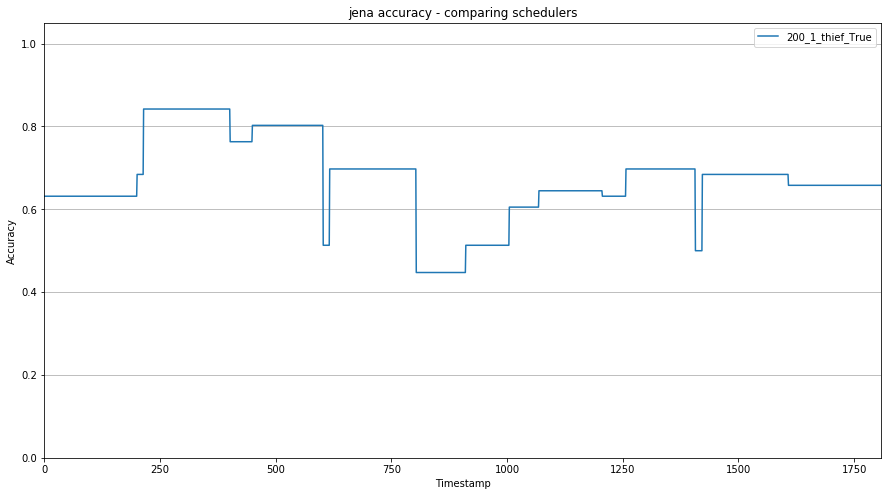

In [153]:
for city in cities:
    plt.figure(figsize=[15,8])
    ax = plt.gca()
    for scheduler in data:
        sim_data[scheduler][city].plot(y="test_acc", ax=ax, label=scheduler)
        plt.title(city)
    #window_points = range(0,max(sim_data[scheduler][city]['t']), 201)
    #for pt in window_points:
    #    plt.axvline(x=pt, color='black', alpha=0.5, ls='--')
    plt.title('{} accuracy - comparing schedulers'.format(city))
    
    ax.set_ylim([0,1.05])
    ax.yaxis.grid(True)
    ax.set_ylabel('Accuracy')
    ax.set_xlabel('Timestamp')

## Comparison plot with real data

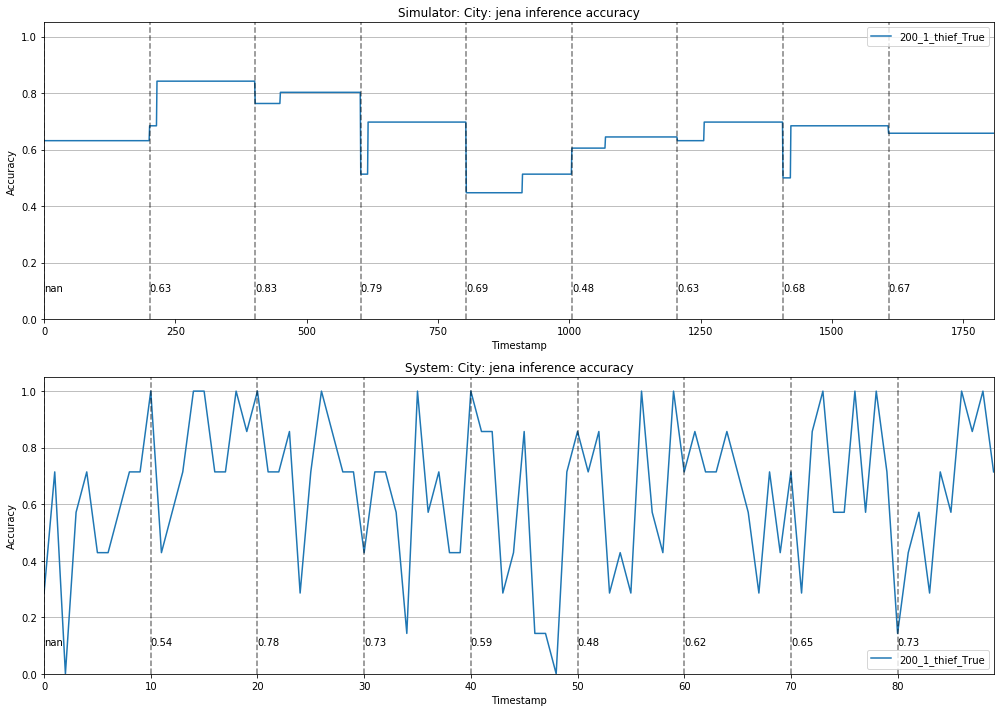

In [190]:
thief_sched_name = [x for x in data if "thief" in x][0]
for city in cities:
    plt.figure(figsize=[14,10])
    
    plt.subplot(211)
    ax = plt.gca()
    for scheduler in data:
        sim_data[scheduler][city].plot(y="test_acc", ax=ax, label=scheduler)
        plt.title(city)
    window_points = range(0,max(sim_data[scheduler][city]['t']), 201)
    
    prev_window_pt = 0
    for pt in window_points:
        df = sim_data[thief_sched_name][city]
        mean_acc = df[df['t'].between(prev_window_pt, pt, inclusive=False)]['test_acc'].mean()
        ax.text(pt,0.1,'{:.2f}'.format(mean_acc))
        plt.axvline(x=pt, color='black', alpha=0.5, ls='--')
        prev_window_pt = pt
        
    plt.title('Simulator: City: {} inference accuracy'.format(city))
    
    ax.set_ylim([0,1.05])
    ax.yaxis.grid(True)
    ax.set_ylabel('Accuracy')
    ax.set_xlabel('Timestamp')
    
    plt.subplot(212)
    ax = plt.gca()
    for scheduler in data:
        data[scheduler][city].plot(y="test_acc", ax=ax, label=scheduler)
    temp_df = data[scheduler][city]
    window_points = temp_df[temp_df["chunk_id"]==0].index
    
    prev_window_pt = 0
    for pt in window_points:
        df = data[thief_sched_name][city]
        df['dummy_window_pts'] = 10*(df['task_id']-1) + df['chunk_id']
        mean_acc = df[df['dummy_window_pts'].between(prev_window_pt, pt, inclusive=False)]['test_acc'].mean()
        ax.text(pt,0.1,'{:.2f}'.format(mean_acc))
        plt.axvline(x=pt, color='black', alpha=0.5, ls='--')
        prev_window_pt = pt
    
    plt.title('System: City: {} inference accuracy'.format(city))
    ax.yaxis.grid(True)
    
    ax.set_ylim([0,1.05])
    ax.yaxis.grid(True)
    ax.set_ylabel('Accuracy')
    ax.set_xlabel('Timestamp')
    ax.legend(loc='lower right')
    # Hack for timestamp
    #ax.set_xticklabels([i*100 for i in range(0,9)])
    plt.tight_layout()
    plt.savefig('sim_sys_compare_{}.pdf'.format(city))

## Viz Schedules - Functions to compare completion times

In [191]:
# Compute job completion times
def get_sim_completion_times(schedule_path, schedule_key, task_id):
    with open(schedule_path) as f:
        schedules = json.load(f)
    this_schedule = schedules[schedule_key][task_id]
    running_jobs = [t for t, alloc in this_schedule['0'].items() if alloc!=0 and 'train' in t]
    completion_times = {} # Stores which jobs have completed
    for event_time, allocation in this_schedule.items():
        for job in running_jobs:
            city_name = job.split('_')[0]
            if allocation[job] == 0 and city_name not in completion_times:
                completion_times[city_name] = float(event_time)
    return completion_times

NEW_RETRAIN_COL_NAMES = ["timestamp", "task_id", "completion_time", "best_val_acc", "preretrain_test_acc", "test_acc", "hp_id", "hp_epochs"]
OLD_RETRAIN_COL_NAMES = ['timestamp', 'task_id', 'completion_time', 'val_acc']
def get_real_completion_times(experiment_root, schedule_key, task_id):
    result_root = os.path.join(experiment_root, schedule_key)
    completion_times = {} # Stores which jobs have completed
    for file_path in glob.glob(os.path.join(result_root, 'retraining_*.csv')):
        city_name = os.path.basename(file_path).strip('.csv').split('_')[-1]
        df = pd.read_csv(file_path, names=NEW_RETRAIN_COL_NAMES)
        df_task = df[df['task_id'] == int(task_id)]
        if not df_task.empty:
            assert(len(df_task)) == 1
            completion_times[city_name] = df_task.completion_time.iloc[0]
    return completion_times

In [50]:
# Test
schedule_path = '/home/romilb/research/msr/ekya/ekya/experiment_drivers/utilitysim_schedules/3city_0707_sysprof_only18/schedules.json'
experiment_root = '/home/romilb/research/msr/results/system_impl/multicity/3city_utilitysim/0707_sysprofs_all'
task_id = '8'
schedule_key = "100_1_thief_True"
get_sim_completion_times(schedule_path, schedule_key, task_id)

print("Sim: {}".format(get_sim_completion_times(schedule_path, schedule_key, task_id)))
print("Real: {}".format(get_real_completion_times(experiment_root, schedule_key, task_id)))

Sim: {'zurich': 12.478330421447753}
Real: {'zurich': 12.065285921096802}


### Compare completion times

In [51]:
schedule_path = '/home/romilb/research/msr/ekya/ekya/experiment_drivers/utilitysim_schedules/3city_0707_sysprof_only18/schedules.json'
experiment_root = '/home/romilb/research/msr/results/system_impl/multicity/3city_utilitysim/0707_sysprofs_all'
task_ids = [str(i) for i in range(1,9)]
schedule_key = '100_1_thief_True'

schedulers = next(os.walk(experiment_root))[1]
cities = [os.path.basename(f).strip('.csv').split('_')[-1] for f in glob.glob(os.path.join(experiment_root, schedulers[0], "inference_*.csv"))]
print(schedulers)
print(cities)

['100_1_thief_True', '100_1_inference_only_True', '100_1_fair_dumb_True']
['jena', 'zurich', 'cologne']


In [52]:
def compare_completion_times(schedule_path, experiment_root, schedule_key, task_id):
    dnf_count = 0 # Did not finish count.
    total_count = 0
    time_data = []
    for task_id in task_ids:
        sim_times = get_sim_completion_times(schedule_path, schedule_key, task_id)
        real_times = get_real_completion_times(experiment_root, schedule_key, task_id)
        for city_name, sim_time in sim_times.items():
            total_count+=1
            if city_name not in real_times:
                # Job did not finish, thus was never logged.
                dnf_count+=1
            time_data.append([task_id, city_name, sim_times[city_name], real_times.get(city_name,'NaN')])
    df = pd.DataFrame(time_data, columns=["task_id", "city", "sim_time", "real_time"])
    df["time_diff"] = df["real_time"] - df["sim_time"]
    df["time_diff_percent"] = ((df["real_time"] - df["sim_time"])/df["sim_time"])*100
    return df, total_count, dnf_count

In [53]:
diff_df, total_count, dnf_count = compare_completion_times(schedule_path, experiment_root, schedule_key, task_id)

In [54]:
diff_df

,task_id,city,sim_time,real_time,time_diff,time_diff_percent
0,1,jena,32.223118,21.061241,-11.161877,-34.639344
1,2,jena,11.401092,11.070409,-0.330684,-2.900457
2,3,jena,23.107703,17.077924,-6.029779,-26.094238
3,4,zurich,45.118598,25.079476,-20.039122,-44.414329
4,5,zurich,11.987734,12.108332,0.120597,1.006007
5,6,jena,40.147635,21.092422,-19.055213,-47.462853
6,7,zurich,35.682658,24.078544,-11.604114,-32.520318
7,8,zurich,12.478330,12.065286,-0.413045,-3.310094


DNF: 0. Total: 9.


Text(0.5, 0, 'Completion time difference (seconds)')

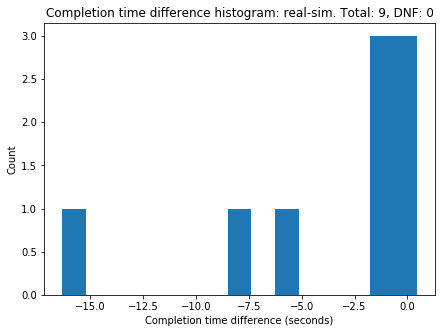

In [46]:
print("DNF: {}. Total: {}.".format(dnf_count, total_count))
fig = plt.figure(figsize=[7,5])
ax = plt.gca()
diff_df.hist(column='time_diff', bins=15, ax=ax)
ax.set_title('Completion time difference histogram: real-sim. Total: {}, DNF: {}'.format(total_count, dnf_count))
ax.grid(False)
ax.set_ylabel('Count')
ax.set_xlabel('Completion time difference (seconds)')

In [47]:
diff_df

,task_id,city,sim_time,real_time,time_diff,time_diff_percent
0,1,jena,19.761817,18.052523,-1.709294,-8.649480
1,2,jena,35.415112,19.090936,-16.324177,-46.093815
2,3,jena,10.726277,11.078161,0.351885,3.280588
3,4,zurich,13.839316,12.108963,-1.730353,-12.503166
4,5,zurich,17.666608,18.118815,0.452207,2.559671
5,6,jena,11.439055,11.084882,-0.354173,-3.096175
6,7,jena,14.454250,13.106947,-1.347302,-9.321151
7,7,zurich,25.060588,17.555153,-7.505435,-29.949158
8,8,cologne,22.207665,16.069030,-6.138636,-27.641967


# Sanity check: Time estimates from profiles

In [83]:
PROFILE_COLUMNS = ["timestamp", "train_time", "train_loss", "train_acc", "train_num_batches",
                            "val_time", "val_loss", "val_acc", "val_num_batches",
                  "test_time", "test_loss", "test_acc", "test_num_batches"]

profile_path = '/home/romilb/research/msr/results/profiling/june_impl/20200617_2121_no101_no50/zurich/0_profile.json'

In [76]:
with open(profile_path) as f:
    profile_json = json.load(f)

In [91]:
TASK_ID = '4'
x=pd.DataFrame(profile_json[TASK_ID], columns=PROFILE_COLUMNS)
resource_time = sum(x.loc[0:9]['train_time'])
print(resource_time)

5.021055698394775


## Viz inference scaling

In [286]:
from ekya.classes.camera import Camera

In [287]:
profile_path = '/home/romilb/research/msr/ekya/ekya/experiment_drivers/real_inference_profiles.csv'
MAX_RES = 0.25
scaling_fn=Camera.get_infer_profile(MAX_RES, profile_path)

In [288]:
scaling_fn(0.1)

0.7100034999650003

# Viz profile acc vs real acc

In [8]:
PROFILE_ROOT = '/home/romilb/research/msr/results/profiling_sys/0713_fixed_seed/profiles/meta/profiles/'
RESULT_ROOT = '/home/romilb/research/msr/results/system_impl/multicity/3city_utilitysim/0713_fixed_seed/'
SCHEDULER = '100_1_thief_True'

In [9]:
with open(PROFILE_PATH) as f:
    profile_data = json.load(f)

NameError: name 'PROFILE_PATH' is not defined

In [10]:
column_format = ['name', 'start_acc', 'actual_end_acc', 'resource_time']
pd.DataFrame(profile_data['taskwise_train_profiles']['1'], columns=column_format)

NameError: name 'profile_data' is not defined

In [11]:
# Actual exec:

In [12]:
def get_profiled_data(profile_root, hp_name, city, task_id):
    profile_path = os.path.join(profile_root, "{}.json".format(city))
    with open(profile_path) as f:
        profile_data = json.load(f)
    column_format = ['name', 'start_acc', 'actual_end_acc', 'resource_time']
    df = pd.DataFrame(profile_data['taskwise_train_profiles'][str(task_id)], columns=column_format)
    row = df[df['name']==hp_name].iloc[0]
    start_acc = row['start_acc']
    end_acc = row['actual_end_acc']
    resource_time = 0 # This should be gotten from get_sim_completion_times
    return start_acc, end_acc, resource_time, df

NEW_RETRAIN_COL_NAMES = ["timestamp", "task_id", "completion_time", "best_val_acc", "preretrain_test_acc", "test_acc", "hp_id", "hp_epochs"]
OLD_RETRAIN_COL_NAMES = ['timestamp', 'task_id', 'completion_time', 'val_acc']

def get_actual_data(result_root, scheduler_name, hp_name, city, task_id):
    hp_id = int(hp_name.split('_')[0])
    hp_epochs = int(hp_name.split('_')[1])
    
    data_path = os.path.join(result_root, scheduler_name, "retraining_{}.csv".format(city))
    if os.path.exists(data_path):
        data = pd.read_csv(data_path, names=NEW_RETRAIN_COL_NAMES)
        
        temp_df = data[data['task_id']==int(task_id)]
        if len(temp_df) > 0:
            row = temp_df.iloc[0]
            assert row['hp_id'] == hp_id
            assert row['hp_epochs'] == hp_epochs

            start_acc = row['preretrain_test_acc']
            end_acc = row['test_acc']
            resource_time = row['completion_time']
            return start_acc, end_acc, resource_time
    
    start_acc = 0
    end_acc = 0
    resource_time = 0
    return start_acc, end_acc, resource_time

In [13]:
_, _, _, df = (get_profiled_data(PROFILE_ROOT, "0_8", "zurich", "5"))

In [14]:
df

,name,start_acc,actual_end_acc,resource_time
0,2_8,0.535714,0.535714,48.440514
1,2_17,0.535714,0.535714,96.784083
2,2_29,0.535714,0.535714,161.290067
3,5_8,0.535714,0.595238,114.210666
4,5_17,0.535714,0.595238,228.696017
5,5_29,0.535714,0.607143,380.926524
6,3_8,0.535714,0.476190,11.293207
7,3_17,0.535714,0.476190,22.694464
8,3_29,0.535714,0.476190,37.963814
9,0_8,0.535714,0.607143,4.873027


In [73]:
print(get_profiled_data(PROFILE_ROOT, "0_8", "zurich", "2"))

(0.5476190476190476, 0.45238095238095233, 0,     name  start_acc  actual_end_acc  resource_time
0    2_8   0.547619        0.511905      46.119311
1   2_17   0.547619        0.511905      92.232721
2   2_29   0.547619        0.511905     153.682216
3    5_8   0.547619        0.511905     108.658852
4   5_17   0.547619        0.464286     217.958528
5   5_29   0.547619        0.440476     363.879091
6    3_8   0.547619        0.511905      10.718197
7   3_17   0.547619        0.535714      21.548941
8   3_29   0.547619        0.535714      36.110896
9    0_8   0.547619        0.452381       4.621855
10  0_17   0.547619        0.452381       9.225880
11  0_29   0.547619        0.440476      15.369569
12   1_8   0.547619        0.476190      23.292320
13  1_17   0.547619        0.476190      46.605712
14  1_29   0.547619        0.416667      77.662668
15   4_8   0.547619        0.464286      54.424999
16  4_17   0.547619        0.476190     109.087186
17  4_29   0.547619        0.428571  

In [74]:
print(get_profiled_data(PROFILE_ROOT, "3_8", "jena", "2"))
print(get_actual_data(RESULT_ROOT, SCHEDULER, "3_8", "jena", "2"))

(0.6842105263157894, 0.8421052631578947, 0,     name  start_acc  actual_end_acc  resource_time
0    2_8   0.684211        0.842105      46.055123
1   2_17   0.684211        0.828947      92.156301
2   2_29   0.684211        0.828947     153.629299
3    5_8   0.684211        0.592105     108.449301
4   5_17   0.684211        0.802632     217.276484
5   5_29   0.684211        0.842105     362.009534
6    3_8   0.684211        0.842105      10.709912
7   3_17   0.684211        0.842105      21.482305
8   3_29   0.684211        0.842105      35.956448
9    0_8   0.684211        0.815789       4.638207
10  0_17   0.684211        0.684211       9.275381
11  0_29   0.684211        0.684211      15.459006
12   1_8   0.684211        0.671053      23.119007
13  1_17   0.684211        0.671053      46.237040
14  1_29   0.684211        0.578947      77.057838
15   4_8   0.684211        0.842105      54.120242
16  4_17   0.684211        0.684211     108.640884
17  4_29   0.684211        0.684211   

AssertionError: 

In [81]:
# Read schedule
schedule_format = ['task_id', 'job_type', 'city', 'weight', 'id', 'epochs']
schedule_path = os.path.join(RESULT_ROOT, SCHEDULER, 'schedule.csv')
df = pd.read_csv(schedule_path, names = schedule_format)

In [83]:
TASKS = df['task_id'].unique()
df_data = []
for t in TASKS:
    this_task_retraining_schedule = df[(df['task_id'] == t) & (df['job_type'] == 'training')]
    for i, row in this_task_retraining_schedule.iterrows():
        if row['weight'] == 0:
            pass
        else:
            city = row['city']
            task_id = row['task_id']
            hp_id = row['id']
            hp_epochs = row['epochs']
            hp_name = "{}_{}".format(hp_id, hp_epochs)
            real_start_acc, real_end_acc, real_time = get_actual_data(RESULT_ROOT, SCHEDULER, hp_name, city, task_id)
            sim_start_acc, sim_end_acc, sim_time, df = get_profiled_data(PROFILE_ROOT, hp_name, city, task_id)
            df_data.append([t,city,real_start_acc,sim_start_acc,real_end_acc,sim_end_acc,real_time,sim_time, hp_name])
            #print("Start acc: {}, {}".format(real_start_acc, sim_start_acc))
            #print("End acc: {}, {}".format(real_end_acc, sim_end_acc))
        #real_completion_time = get_actual_data(RESULT_ROOT, SCHEDULER, "3_8", "jena", "2"))
cols = ['task_id','city','real_preretrain_acc','sim_preretrain_acc','real_postretrain_acc','sim_postretrain_acc','real_time','sim_time','hp_name']
df = pd.DataFrame(df_data, columns=cols)

KeyError: 'task_id'

In [375]:
df["real_preretrain_acc"]

,task_id,city,real_preretrain_acc,sim_preretrain_acc,real_postretrain_acc,sim_postretrain_acc,real_time,sim_time,hp_name
0,1,zurich,0.714286,0.666667,0.666667,0.702381,25.063012,0,0_17
1,2,jena,0.657895,0.684211,0.802632,0.815789,21.091805,0,3_8
2,3,jena,0.776316,0.763158,0.802632,0.815789,11.068629,0,0_8
3,4,jena,0.513158,0.513158,0.592105,0.697368,18.074499,0,0_17
4,5,zurich,0.535714,0.535714,0.583333,0.607143,25.085169,0,3_8
5,6,zurich,0.488095,0.488095,0.488095,0.702381,12.077127,0,0_8
6,7,jena,0.657895,0.631579,0.644737,0.671053,22.116915,0,0_17
7,8,zurich,0.500000,0.559524,0.595238,0.654762,24.090533,0,3_8
8,9,zurich,0.714286,0.714286,0.666667,0.738095,13.083035,0,0_8


In [23]:
df

,task_id,city,real_preretrain_acc,sim_preretrain_acc,real_postretrain_acc,sim_postretrain_acc,real_time,sim_time,hp_name
0,1,zurich,0.714286,0.666667,0.666667,0.666667,25.063012,0,0_17
1,2,jena,0.657895,0.684211,0.802632,0.815789,21.091805,0,3_8
2,3,jena,0.776316,0.763158,0.802632,0.802632,11.068629,0,0_8
3,4,jena,0.513158,0.513158,0.592105,0.592105,18.074499,0,0_17
4,5,zurich,0.535714,0.535714,0.583333,0.428571,25.085169,0,3_8
5,6,zurich,0.488095,0.488095,0.488095,0.642857,12.077127,0,0_8
6,7,jena,0.657895,0.631579,0.644737,0.605263,22.116915,0,0_17
7,8,zurich,0.500000,0.559524,0.595238,0.571429,24.090533,0,3_8
8,9,zurich,0.714286,0.714286,0.666667,0.738095,13.083035,0,0_8


In [256]:
df

,task_id,city,real_preretrain_acc,sim_preretrain_acc,real_postretrain_acc,sim_postretrain_acc,real_time,sim_time
0,1,zurich,0.714286,0.666667,0.666667,0.702381,25.066890,0
1,2,jena,0.657895,0.684211,0.802632,0.815789,22.101386,0
2,3,jena,0.776316,0.763158,0.802632,0.815789,11.060511,0
3,4,jena,0.513158,0.513158,0.592105,0.697368,18.080837,0
4,5,zurich,0.535714,0.535714,0.583333,0.607143,25.115971,0
5,6,zurich,0.488095,0.488095,0.488095,0.702381,12.103580,0
6,7,jena,0.657895,0.631579,0.644737,0.671053,21.087322,0
7,8,zurich,0.500000,0.559524,0.595238,0.654762,24.102554,0
8,9,zurich,0.714286,0.714286,0.666667,0.738095,12.109627,0


# Hack - set inference accuracy to the mean over entire task

In [266]:
BASE_DIR = '/home/romilb/research/msr/results/system_impl/multicity/3city_utilitysim/0709/'

In [272]:
data = {}
dfs = []
for scheduler in schedulers:
    for city in cities:
        inference_csv_path = os.path.join(BASE_DIR, scheduler, "inference_{}.csv".format(city))
        inference_df = pd.read_csv(inference_csv_path, names=inference_columns)
        inference_df['t'] = inference_df["timestamp"] - inference_df["timestamp"].min()
        inference_df['city'] = city
        inference_df['scheduler'] = scheduler
        dfs.append(inference_df)
all_data = pd.concat(dfs)

data = {}
for scheduler in schedulers:
    data_citywise = {}
    for city in cities:
        data_citywise[city] = all_data[(all_data['scheduler'] == scheduler)&(all_data['city'] == city)]
    data[scheduler] = data_citywise
    
# Do the same for retraining data
NEW_RETRAIN_COL_NAMES = ["timestamp", "task_id", "completion_time", "best_val_acc", "preretrain_test_acc", "test_acc", "hp_id", "hp_epochs"]
OLD_RETRAIN_COL_NAMES = ["timestamp", "task_id", "completion_time", "best_val_acc", "preretrain_test_acc", "test_acc"]
dfs = []
for scheduler in schedulers:
    for city in cities:
        training_csv_path = os.path.join(BASE_DIR, scheduler, "retraining_{}.csv".format(city))
        if os.path.exists(training_csv_path):
            training_df = pd.read_csv(training_csv_path, names=NEW_RETRAIN_COL_NAMES)
            training_df['city'] = city
            training_df['scheduler'] = scheduler
            dfs.append(training_df)
all_data_retrain = pd.concat(dfs)

In [273]:
all_data_retrain
# WHY IS TEST ACC LOWER THAN PRERETRAIN TEST ACC"?!?

,timestamp,task_id,completion_time,best_val_acc,preretrain_test_acc,test_acc,hp_id,hp_epochs,city,scheduler
0,1.594334e+09,2,21.091805,0.770221,0.657895,0.802632,3,8,jena,100_1_thief_True
1,1.594334e+09,3,11.068629,0.692683,0.776316,0.802632,0,8,jena,100_1_thief_True
2,1.594334e+09,4,18.074499,0.741228,0.513158,0.592105,0,17,jena,100_1_thief_True
3,1.594335e+09,7,22.116915,0.708054,0.657895,0.644737,0,17,jena,100_1_thief_True
0,1.594334e+09,1,25.063012,0.763485,0.714286,0.666667,0,17,zurich,100_1_thief_True
1,1.594334e+09,5,25.085169,0.714286,0.535714,0.583333,3,8,zurich,100_1_thief_True
2,1.594334e+09,6,12.077127,0.649770,0.488095,0.488095,0,8,zurich,100_1_thief_True
3,1.594335e+09,8,24.090533,0.699902,0.500000,0.595238,3,8,zurich,100_1_thief_True
4,1.594335e+09,9,13.083035,0.660909,0.714286,0.666667,0,8,zurich,100_1_thief_True
0,1.594335e+09,1,36.096957,0.753112,0.714286,0.702381,0,29,zurich,100_1_fair_dumb_True


In [274]:
sched = "100_1_thief_True"
city = "jena"

In [275]:
sched = '100_1_thief_True'
for city in cities:
    inference_data = data[sched][city]
    tasks = inference_data.task_id.unique()
    for t in tasks:
        retrain_data = all_data_retrain[(all_data_retrain["scheduler"] == sched) & 
                               (all_data_retrain["city"] == city) &
                               (all_data_retrain["task_id"] == t)]
        if not retrain_data.empty:
            assert len(retrain_data) == 1
            retrained_mean_acc = retrain_data.iloc[0]['test_acc']
            retrain_completion_timestamp = retrain_data.iloc[0]['timestamp']
            print(retrained_mean_acc)
            remaining_samples = (inference_data["task_id"] == t) & (inference_data["timestamp"] > retrain_completion_timestamp)
            inference_data.loc[remaining_samples, 'test_acc'] = retrained_mean_acc

0.8026315789473684
0.8026315789473684
0.5921052631578947
0.6447368421052632
0.6666666666666666
0.5833333333333333
0.4880952380952381
0.5952380952380952
0.6666666666666666


In [276]:
#data[sched]['jena']
for scheduler in schedulers:
    acc_per_city = []
    for city in cities:
        d = data[scheduler][city]
        mean_acc_city = d.mean()['test_acc']
        acc_per_city.append(mean_acc_city)
    mean_acc = np.mean(acc_per_city)
    print("Mean acc {}: {}".format(scheduler, mean_acc))

Mean acc 100_1_thief_True: 0.6180220247921989
Mean acc 100_1_inference_only_True: 0.6274801587301587
Mean acc 100_1_fair_dumb_True: 0.5874779128453747


In [278]:
data[sched]['jena']

,timestamp,task_id,chunk_id,test_acc,t,city,scheduler
0,1.594334e+09,1,0,0.285714,0.000000,jena,100_1_thief_True
1,1.594334e+09,1,1,0.714286,7.583381,jena,100_1_thief_True
2,1.594334e+09,1,2,0.714286,17.589947,jena,100_1_thief_True
3,1.594334e+09,1,3,0.714286,27.767261,jena,100_1_thief_True
4,1.594334e+09,1,4,0.571429,37.639024,jena,100_1_thief_True
5,1.594334e+09,1,5,0.857143,47.620735,jena,100_1_thief_True
6,1.594334e+09,1,6,0.285714,57.627531,jena,100_1_thief_True
7,1.594334e+09,1,7,0.571429,67.633154,jena,100_1_thief_True
8,1.594334e+09,1,8,0.714286,77.642246,jena,100_1_thief_True
9,1.594334e+09,1,9,0.714286,87.684431,jena,100_1_thief_True


In [ ]:
_, _, _, df = (get_profiled_data(PROFILE_ROOT, "0_8", "zurich", "5"))

#### Wmo datagen

In [193]:
d = mean_data.unstack(level=1)
# 1 GPU factors
d.loc[1, 'thief'] = np.array([0.87, 0.83, 0.75, 0.71, 0.65]) + np.random.normal(scale=0.001, size=[1,5])
d.loc[1, 'fair_0.5'] = np.array([0.87, 0.74, 0.69, 0.46, 0.44]) + np.random.normal(scale=0.001, size=[1,5])
d.loc[1, 'fair_3_17_0.7'] = np.array([0.86, 0.77, 0.67, 0.599, 0.55]) + np.random.normal(scale=0.001, size=[1,5])
d.loc[1, 'fair_4_8_0.5']= np.array([0.81, 0.67, 0.62, 0.41, 0.55]) + np.random.normal(scale=0.001, size=[1,5])
d.loc[1, 'fair_5_29_0.3'] = np.array([0.74, 0.70, 0.63, 0.54, 0.55]) + np.random.normal(scale=0.001, size=[1,5])

# 2 GPU factors
d.loc[2, 'thief'] = np.array([0.88, 0.85, 0.81, 0.74, 0.65]) + np.random.normal(scale=0.001, size=[1,5])
d.loc[2, 'fair_0.5'] = np.array([0.87, 0.81, 0.75, 0.61, 0.44]) + np.random.normal(scale=0.001, size=[1,5])
d.loc[2, 'fair_3_17_0.7'] = np.array([0.86, 0.74, 0.72, 0.65, 0.55]) + np.random.normal(scale=0.001, size=[1,5])
d.loc[2, 'fair_4_8_0.5']= np.array([0.87, 0.72, 0.62, 0.54, 0.55]) + np.random.normal(scale=0.001, size=[1,5])
d.loc[2, 'fair_5_29_0.3'] = np.array([0.85, 0.77, 0.74, 0.51, 0.55]) + np.random.normal(scale=0.001, size=[1,5])

In [194]:
d

num_cities                     2         4         6         8         10
num_gpus scheduler                                                       
1        fair_0.5        0.870602  0.740376  0.688752  0.460761  0.441187
         fair_3_17_0.7   0.859459  0.770159  0.668450  0.599355  0.547498
         fair_4_8_0.5    0.810567  0.669579  0.622355  0.409500  0.552284
         fair_5_29_0.3   0.739392  0.698941  0.630165  0.539608  0.549828
         thief           0.868215  0.828872  0.748691  0.710082  0.649552
2        fair_0.5        0.869457  0.810190  0.750665  0.610521  0.440361
         fair_3_17_0.7   0.861111  0.737703  0.720332  0.650174  0.549344
         fair_4_8_0.5    0.870424  0.720358  0.621333  0.539729  0.549565
         fair_5_29_0.3   0.848478  0.769431  0.739967  0.509244  0.549649
         thief           0.878479  0.850135  0.808707  0.740054  0.649147
4        fair_0.5        0.785893  0.782589  0.795476  0.812989  0.771211
         thief           0.824286  0.800062  0.820024  0.815518  0.805044
         Fair Scheduler       NaN       NaN       NaN  0.799895       NaN

In [195]:
plot_mean_data = d.stack()

In [196]:
plotting_tuples = [('fair_0.5', 'Uniform (Config 1, 50%)', '*', '--', 'C1'),
                  ('fair_5_29_0.3', 'Uniform (Config 2, 30%)', 'd', '--', 'C1'),
                  ('fair_4_8_0.5', 'Uniform (Config 2, 50%)', 's', '-.', 'C1'),
                  ('fair_3_17_0.7', 'Uniform (Config 2, 90%)', 'x', '-', 'C1'),
                  ('thief', 'Ekya', 'o', '-', 'C2')]

1
2


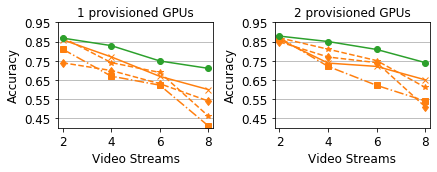

In [198]:
NUM_GPUS_RANGE=[1,2]

nrow = 1; ncol = 2;
fig, axs = plt.subplots(figsize=[aspect*height*1.9, height], nrows=nrow, ncols=ncol)
axs = axs.reshape(-1)

for i, gpus in enumerate(NUM_GPUS_RANGE):
    print(gpus)
    #fig = plt.figure(figsize=[aspect*height, height])
    ax=axs[i]
    for sched, label, marker, style, color in plotting_tuples:
        ax=plot_mean_data[gpus].unstack(level=0).loc[[2,4,6,8]][sched].plot(ax=ax, label=label, marker=marker, style=style, color=color)
    #ax=plot_mean_data[gpus].unstack(level=0).loc[[2,4,6,8]].plot(marker='o',ax=ax)# Change level to 1 if that works
    #plt.title('{} GPUs'.format(gpus))
    ax.set_xlabel('Video Streams')
    ax.set_ylabel('Accuracy')
    x_tick_range = range(2,9,2)
    ax.set_xticks(x_tick_range)
    ax.set_xticklabels(["{:d}".format(x) for x in x_tick_range])
    #ax.set_xlim([0.8, 3.2])
    xlim = ax.get_xlim()
    xlim = [xlim[0] - 0.2, xlim[1] + 0.2]
    ax.set_xlim(xlim)
    
    y_tick_range = np.arange(0.35,0.96,0.1)
    ax.set_yticks(y_tick_range)
    ax.set_yticklabels(["{:.2f}".format(x) for x in y_tick_range])
    ax.set_ylim([0.4, 0.95])
    ax.yaxis.grid(True)
    ax.set_title(f'{gpus} provisioned GPUs')
#axs[1].set_ylim([0.5, 0.85])
handles, labels = ax.get_legend_handles_labels()
#fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(0,1,1,0.25), ncol=2)
#plt.legend( handles, labels, loc = 'upper center', bbox_to_anchor = (0,-0.1,1,1), bbox_transform = plt.gcf().transFigure )
plt.tight_layout()
#lgd = ax.legend(loc="lower center", bbox_to_anchor=(0,1.02,1,0.2), ncol=2)
#plt.savefig(os.path.join("camready/sysimpl_varyingcities_streams_cityscapes_{}gpu.pdf".format(gpus)), bbox_inches='tight')
plt.savefig(os.path.join("camready/sysimpl_varyingcities_streams_waymo.pdf".format(gpus)), bbox_inches='tight')